In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
def mean_var_normalize(data):
    z = (data - np.mean(data))/np.std(data)
    return z

def matrix_to_dict (data):
        data_dict ={}
        for i in range (0, data.shape[1]):
            data_dict[i] = data[:,i]
        return data_dict
    
def dict_to_matrix(data_dict):
    data_pts = len(data_dict[0])
    features = len(data_dict)
    matrix = np.zeros((data_pts,features))
    for i in range (0,features):
        matrix[:,i] =data_dict[i]
    return matrix

## Load the training data into feature matrix, class labels, and event ids:

In [3]:
from proj1_helpers import *
DATA_TRAIN_PATH = 'train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [4]:
headers = [
"DER_mass_MMC",
"DER_mass_transverse_met_lep",
"DER_mass_vis",
"DER_pt_h",
"DER_deltaeta_jet_jet",
"DER_mass_jet_jet",
"DER_prodeta_jet_jet",
"DER_deltar_tau_lep",
"DER_pt_tot",
"DER_sum_pt",
"DER_pt_ratio_lep_tau",
"DER_met_phi_centrality",
"DER_lep_eta_centrality",
"PRI_tau_pt",
"PRI_tau_eta",
"PRI_tau_phi",
"PRI_lep_pt",
"PRI_lep_eta",
"PRI_lep_phi",
"PRI_met",
"PRI_met_phi",
"PRI_met_sumet",
"PRI_jet_num",
"PRI_jet_leading_pt",
"PRI_jet_leading_eta",
"PRI_jet_leading_phi",
"PRI_jet_subleading_pt",
"PRI_jet_subleading_eta",
"PRI_jet_subleading_phi",
"PRI_jet_all_pt"]


In [5]:
tX.shape

(250000, 30)

In [6]:
val, fre = np.unique(y, return_counts=True)
print(val, fre)

[-1.  1.] [164333  85667]


In [7]:
# # Check 1: Checking for NaN values in each column
# for i in range (tX.shape[1]):
#     print("col {} -> {} " .format(i, np.isnan(np.sum(tX[:,i]))))

In [7]:
# Check 2: Checking the mean and std for each column
for i in range (tX.shape[1]):
    print("Col {} --> {:.2f} ({:.2f}) --> Max val= {:.2f}  Min val= {:.2f} " .format(i, np.mean(tX[:,i]), np.std(tX[:,i]), np.max(tX[:,i]), np.min(tX[:,i])))

Col 0 --> -49.02 (406.34) --> Max val= 1192.03  Min val= -999.00 
Col 1 --> 49.24 (35.34) --> Max val= 690.08  Min val= 0.00 
Col 2 --> 81.18 (40.83) --> Max val= 1349.35  Min val= 6.33 
Col 3 --> 57.90 (63.66) --> Max val= 2835.00  Min val= 0.00 
Col 4 --> -708.42 (454.48) --> Max val= 8.50  Min val= -999.00 
Col 5 --> -601.24 (657.97) --> Max val= 4974.98  Min val= -999.00 
Col 6 --> -709.36 (453.02) --> Max val= 16.69  Min val= -999.00 
Col 7 --> 2.37 (0.78) --> Max val= 5.68  Min val= 0.21 
Col 8 --> 18.92 (22.27) --> Max val= 2835.00  Min val= 0.00 
Col 9 --> 158.43 (115.71) --> Max val= 1852.46  Min val= 46.10 
Col 10 --> 1.44 (0.84) --> Max val= 19.77  Min val= 0.05 
Col 11 --> -0.13 (1.19) --> Max val= 1.41  Min val= -1.41 
Col 12 --> -708.99 (453.60) --> Max val= 1.00  Min val= -999.00 
Col 13 --> 38.71 (22.41) --> Max val= 764.41  Min val= 20.00 
Col 14 --> -0.01 (1.21) --> Max val= 2.50  Min val= -2.50 
Col 15 --> -0.01 (1.82) --> Max val= 3.14  Min val= -3.14 
Col 16 --> 46

In [8]:
# creating data dictionary for easy use 
data_dict = matrix_to_dict (tX)

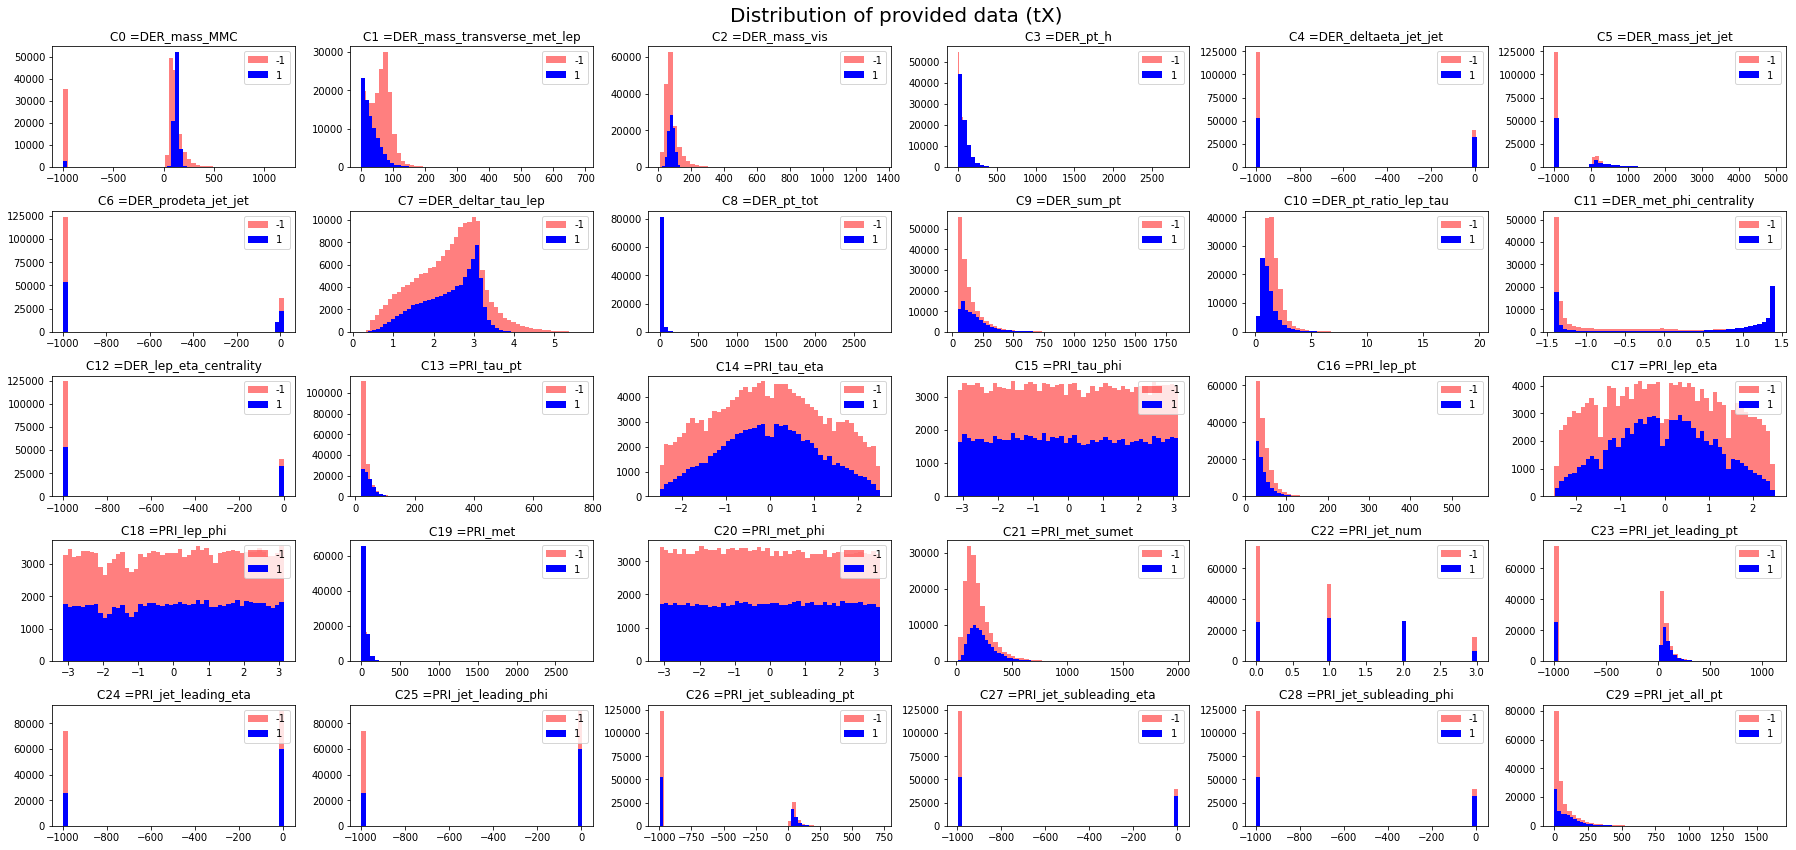

In [129]:
# Getting a good view of the distribution
fig, axs = plt.subplots(5,6, figsize=(25, 12))
fig.subplots_adjust(hspace = .5, wspace=.25)
ax = axs.flatten()
for i in range (0,30):
    ax[i].hist(data_dict[i][np.where(y==-1)], bins=50, color="red",alpha=0.5, label = '-1')
    ax[i].hist(data_dict[i][np.where(y==1)], bins=50, color = "blue", alpha=1, label ='1')
    ax[i].set_title('C{} ={}'.format(i, headers[i]))
    ax[i].legend(loc="upper right")
plt.suptitle("Distribution of provided data (tX)", fontsize="20")
fig.tight_layout()
plt.savefig("tX_distribution.png", dpi=300)

In [10]:
def jet_wise_split(idx_array,tX,y):
    X_j = np.zeros((idx_array.shape[0],30))
    y_j =np.zeros(idx_array.shape[0])

    for i in range (0,idx_array.shape[0]):
        X_j[i][:] = tX[idx_array[i]]
        y_j[i] = y[idx_array[i]]
    print(X_j.shape, y_j.shape)
    return X_j, y_j 

j0_idx= np.where (tX[:,22]==0)[0]
j1_idx= np.where (tX[:,22]==1)[0]
j2_idx= np.where (tX[:,22]==2)[0]
j3_idx= np.where (tX[:,22]==3)[0]


######## Creating jet number wise splits ########### 
X_j0, y_j0 = jet_wise_split(j0_idx,tX,y)
X_j1, y_j1 = jet_wise_split(j1_idx,tX,y)
X_j2, y_j2 = jet_wise_split(j2_idx,tX,y)
X_j3, y_j3 = jet_wise_split(j3_idx,tX,y)

#############  Creating jet wise dict ######
data_dict_j0 = matrix_to_dict(X_j0)
data_dict_j1 = matrix_to_dict(X_j1)
data_dict_j2 = matrix_to_dict(X_j2)
data_dict_j3 = matrix_to_dict(X_j3)

(99913, 30) (99913,)
(77544, 30) (77544,)
(50379, 30) (50379,)
(22164, 30) (22164,)


In [11]:
val, fre = np.unique(y, return_counts=True)
print("For complete data", val, fre)

val, fre = np.unique(y_j0, return_counts=True)
print("For j0 ", val, fre)

val, fre = np.unique(y_j1, return_counts=True)
print("For j1 ", val, fre)

val, fre = np.unique(y_j2, return_counts=True)
print("For j2 ", val, fre)

val, fre = np.unique(y_j3, return_counts=True)
print("For j3 ", val, fre)

For complete data [-1.  1.] [164333  85667]
For j0  [-1.  1.] [74421 25492]
For j1  [-1.  1.] [49834 27710]
For j2  [-1.  1.] [24645 25734]
For j3  [-1.  1.] [15433  6731]


Text(0.5, 0.98, 'Distribution for jet_num:j0  ')

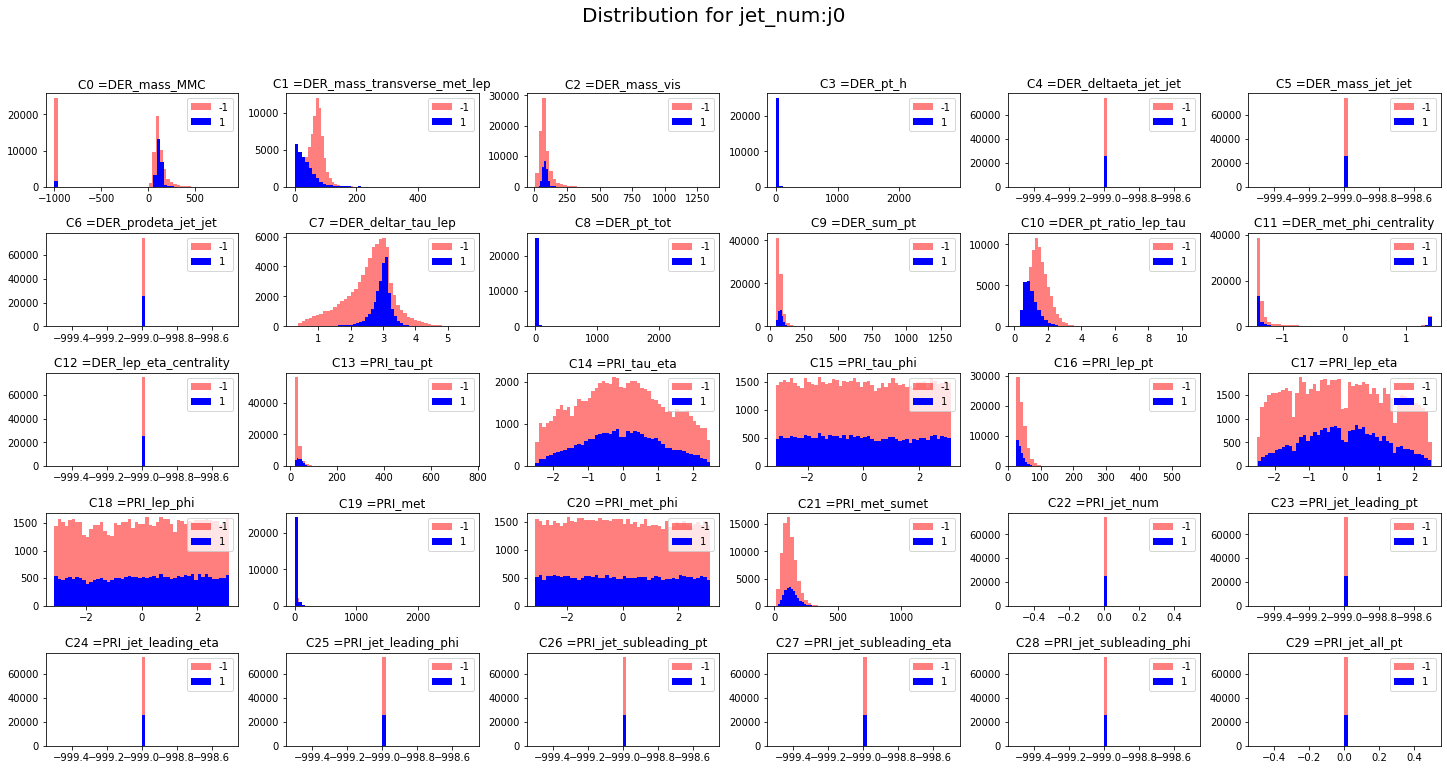

In [12]:
# Visualizing after the jet feature. 
plot_dist = 'j0' # enter the value of jet_num (j0, j1, j2, j3) you want to visualize

if plot_dist == 'j0':
    plot_data_x = data_dict_j0
    plot_data_y = y_j0
if plot_dist == 'j1':
    plot_data_x = data_dict_j1
    plot_data_y = y_j1
if plot_dist == 'j2':
    plot_data_x = data_dict_j2
    plot_data_y = y_j2
if plot_dist == 'j3':
    plot_data_x = data_dict_j3
    plot_data_y = y_j3


fig, axs = plt.subplots(5,6, figsize=(25, 12))
fig.subplots_adjust(hspace = .5, wspace=.25)
ax = axs.flatten()
for i in range (0,30):
    ax[i].hist(plot_data_x[i][np.where(plot_data_y==-1)], bins=50, color="red",alpha=0.5, label = '-1')
    ax[i].hist(plot_data_x[i][np.where(plot_data_y==1)], bins=50, color = "blue", alpha=1, label ='1')
    ax[i].set_title('C{} ={}'.format(i, headers[i]))
    ax[i].legend(loc="upper right")
plt.suptitle("Distribution for jet_num:{}  ".format(plot_dist), fontsize="20")

In [13]:
# detecting the columns with 0 variance
def Zero_variance_detector(data_dict): 
    no_var =[]
    for i in range (0, len(data_dict)):
        if (np.var(data_dict[i]) ==0):
            no_var.append(i)
    return no_var

no_var_col_j0 = Zero_variance_detector(data_dict_j0)
no_var_col_j1 = Zero_variance_detector(data_dict_j1)
no_var_col_j2 = Zero_variance_detector(data_dict_j2)
no_var_col_j3 = Zero_variance_detector(data_dict_j3)

print("Total 0 Variance columns:\nj_0:{}\nj_1:{}\nj_2:{}\nj_3:{}".format(len(no_var_col_j0)-1,len(no_var_col_j1)-1,len(no_var_col_j2)-1,len(no_var_col_j3)-1))

Total 0 Variance columns:
j_0:11
j_1:7
j_2:0
j_3:0


In [14]:
# removing the zero variance columns
data_j0 = dict_to_matrix(data_dict_j0)
data_j1 = dict_to_matrix(data_dict_j1)
data_j2 = dict_to_matrix(data_dict_j2)
data_j3 = dict_to_matrix(data_dict_j3)
print(data_j0.shape,data_j1.shape,data_j2.shape,data_j3.shape)

data_j0_new = np.delete(data_j0, no_var_col_j0, axis=1)
data_j1_new = np.delete(data_j1, no_var_col_j1, axis=1)
data_j2_new = np.delete(data_j2, no_var_col_j2, axis=1)
data_j3_new = np.delete(data_j3, no_var_col_j3, axis=1)

print(data_j0_new.shape,data_j1_new.shape,data_j2_new.shape,data_j3_new.shape)

(99913, 30) (77544, 30) (50379, 30) (22164, 30)
(99913, 18) (77544, 22) (50379, 29) (22164, 29)


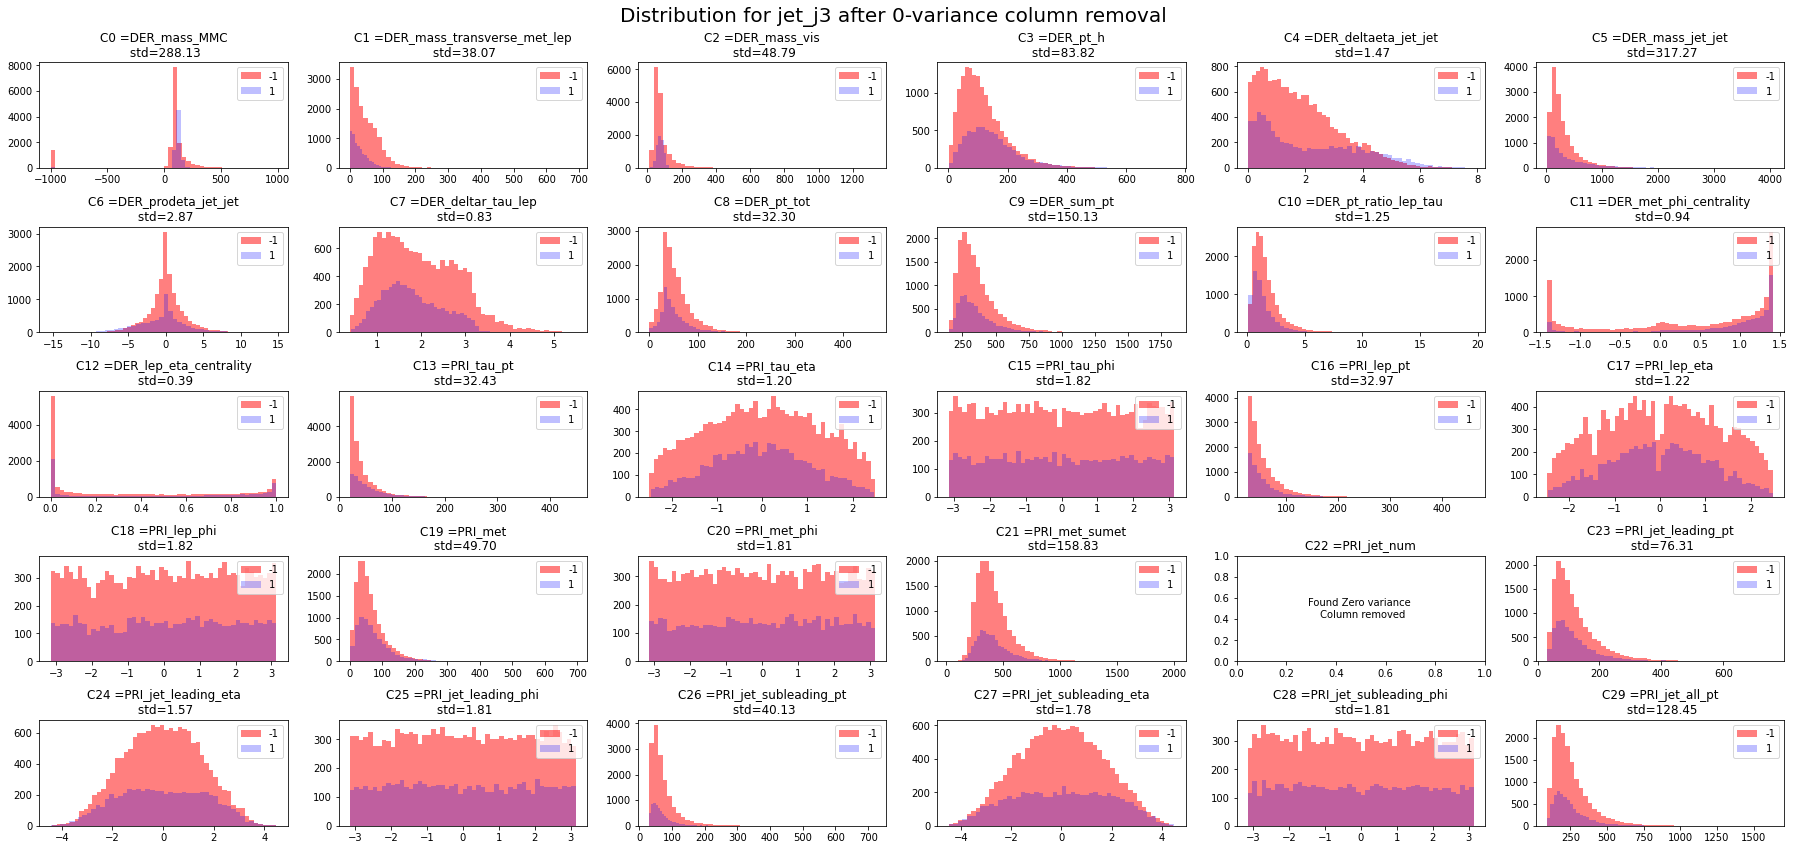

In [128]:
# Visualizing after the jet feature after 0-var column removal. 

plot_dist = 'j2' # enter the value of jet_num (j0, j1, j2, j3) you want to visualize

if plot_dist == 'j0':
    plot_data_x = data_dict_j0
    plot_data_y = y_j0
    req_header_idx =  list(set(range(0,30)) - set(no_var_col_j0))
if plot_dist == 'j1':
    plot_data_x = data_dict_j1
    plot_data_y = y_j1
    req_header_idx =  list(set(range(0,30)) - set(no_var_col_j1))
if plot_dist == 'j2':
    plot_data_x = data_dict_j2
    plot_data_y = y_j2
    req_header_idx =  list(set(range(0,30)) - set(no_var_col_j2))
if plot_dist == 'j3':
    plot_data_x = data_dict_j3
    plot_data_y = y_j3
    req_header_idx =  list(set(range(0,30)) - set(no_var_col_j3))
    
fig, axs = plt.subplots(5,6, figsize=(25, 12))
fig.subplots_adjust(hspace = .75, wspace=.25)
ax = axs.flatten()
for i in range (0,30):
    if i in req_header_idx:
        ax[i].hist(plot_data_x[i][np.where(plot_data_y==-1)], bins=50, color="red",alpha=0.5, label = '-1')
        ax[i].hist(plot_data_x[i][np.where(plot_data_y==1)], bins=50, color = "blue", alpha=0.25, label ='1')
        ax[i].set_title('C{} ={}\n std={:.2f}'.format(i, headers[i],np.std(plot_data_x[i])))
        ax[i].legend(loc="upper right")
    else:
        ax[i].text(0.5, 0.5, 'Found Zero variance \n Column removed', horizontalalignment='center', verticalalignment='center', transform=ax[i].transAxes)

        ax[i].set_title('C{} ={}'.format(i, headers[i]))

plt.suptitle("Distribution for jet_{:} after 0-variance column removal ".format(plot_dist), fontsize="20")

fig.tight_layout()
#plt.savefig("j0_distribution.png", dpi=300)

In [16]:
# removing the outlier and replacing them with mean or median
def otlier_999_handel (data_dict, col, stat):
    print("for col :{}".format(col))
    if stat == 'mean':
        #print("Old mean = {} ; Old std = {} ".format(np.mean(data_dict[col]), np.std(data_dict[col])))
        temp = data_dict[col][~np.isin(data_dict[col], (-999))].copy()
        #print("good part mean = {} ; good part std = {} ".format(np.mean(temp), np.std(temp)))
        req_mean = np.mean(temp)
        col_dash = np.where(data_dict[col] == -999, req_mean, data_dict[col])
        #print("mean_dash = {} ; std_dash = {} ".format(np.mean(col_dash), np.std(col_dash)))
    
    if stat == 'median':
        #print("Old median = {} ; Old std = {} ".format(np.median(data_dict[col]), np.std(data_dict[col])))
        temp = data_dict[col][~np.isin(data_dict[col], (-999))].copy()
        #print("good part median = {} ; good part std = {} ".format(np.median(temp), np.std(temp)))
        req_median = np.median(temp)
        col_dash = np.where(data_dict[col] == -999, req_median, data_dict[col])
        #print("median_dash = {} ; std_dash = {} ".format(np.median(col_dash), np.std(col_dash)))
    
    return col_dash

def start_999_handle (data_dict, outlier_col, stat):
    data_dict_ = {}
    for i in range (0, len(data_dict)):
        if i in outlier_col:
            data_dict_[i] = otlier_999_handel(data_dict, i , stat)
        else:
            data_dict_[i] = data_dict[i]
    return data_dict_ 


outlier_col = [0]
data_dict_j0_fixed = start_999_handle(matrix_to_dict(data_j0_new),outlier_col,'median')
data_dict_j1_fixed = start_999_handle(matrix_to_dict(data_j1_new),outlier_col,'median')
data_dict_j2_fixed = start_999_handle(matrix_to_dict(data_j2_new),outlier_col,'median')
data_dict_j3_fixed = start_999_handle(matrix_to_dict(data_j3_new),outlier_col,'median')

print(len(data_dict_j0_fixed),len(data_dict_j1_fixed),len(data_dict_j2_fixed),len(data_dict_j3_fixed))

for col :0
for col :0
for col :0
for col :0
18 22 29 29


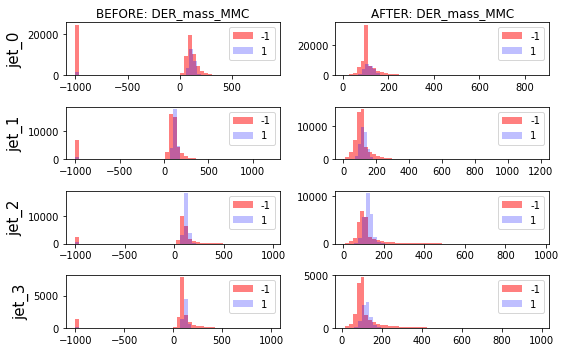

In [83]:
### Before after effect of -999 value removal ############

fig, axs = plt.subplots(4,2, figsize=(8, 5))
fig.subplots_adjust(hspace = .5, wspace=.25)
viz_col=0
ax = axs.flatten()
ax[0].hist(data_dict_j0[viz_col][np.where(y_j0==-1)], bins=50, color="red",alpha=0.5, label = '-1')
ax[0].hist(data_dict_j0[viz_col][np.where(y_j0==1)], bins=50, color = "blue", alpha=0.25, label ='1')
ax[0].set_title('BEFORE: DER_mass_MMC')
ax[0].set_ylabel('jet_0', size=15)
ax[0].legend(loc="upper right")

ax[1].hist(data_dict_j0_fixed[viz_col][np.where(y_j0==-1)], bins=50, color="red",alpha=0.5, label = '-1')
ax[1].hist(data_dict_j0_fixed[viz_col][np.where(y_j0==1)], bins=50, color = "blue", alpha=0.25, label ='1')
ax[1].set_title('AFTER: DER_mass_MMC')
ax[1].legend(loc="upper right")


ax[2].hist(data_dict_j1[viz_col][np.where(y_j1==-1)], bins=50, color="red",alpha=0.5, label = '-1')
ax[2].hist(data_dict_j1[viz_col][np.where(y_j1==1)], bins=50, color = "blue", alpha=0.25, label ='1')
ax[2].set_ylabel('jet_1', size=15)
ax[2].legend(loc="upper right")

ax[3].hist(data_dict_j1_fixed[viz_col][np.where(y_j1==-1)], bins=50, color="red",alpha=0.5, label = '-1')
ax[3].hist(data_dict_j1_fixed[viz_col][np.where(y_j1==1)], bins=50, color = "blue", alpha=0.25, label ='1')
ax[3].legend(loc="upper right")

ax[4].hist(data_dict_j2[viz_col][np.where(y_j2==-1)], bins=50, color="red",alpha=0.5, label = '-1')
ax[4].hist(data_dict_j2[viz_col][np.where(y_j2==1)], bins=50, color = "blue", alpha=0.25, label ='1')
ax[4].set_ylabel('jet_2', size=15)
ax[4].legend(loc="upper right")

ax[5].hist(data_dict_j2_fixed[viz_col][np.where(y_j2==-1)], bins=50, color="red",alpha=0.5, label = '-1')
ax[5].hist(data_dict_j2_fixed[viz_col][np.where(y_j2==1)], bins=50, color = "blue", alpha=0.25, label ='1')
ax[5].legend(loc="upper right")

ax[6].hist(data_dict_j3[viz_col][np.where(y_j3==-1)], bins=50, color="red",alpha=0.5, label = '-1')
ax[6].hist(data_dict_j3[viz_col][np.where(y_j3==1)], bins=50, color = "blue", alpha=0.25, label ='1')
ax[6].set_ylabel('jet_3', size=15)
ax[6].legend(loc="upper right")

ax[7].hist(data_dict_j3_fixed[viz_col][np.where(y_j3==-1)], bins=50, color="red",alpha=0.5, label = '-1')
ax[7].hist(data_dict_j3_fixed[viz_col][np.where(y_j3==1)], bins=50, color = "blue", alpha=0.25, label ='1')
ax[7].legend(loc="upper right")
fig.tight_layout()
plt.savefig("before_after.png", dpi=300)

In [18]:
data_dict_j0_fixed_norm={}
data_dict_j1_fixed_norm={}
data_dict_j2_fixed_norm={}
data_dict_j3_fixed_norm={}
for i in range (0,len(data_dict_j0_fixed)):
    data_dict_j0_fixed_norm[i] = mean_var_normalize(data_dict_j0_fixed[i])
for i in range (0,len(data_dict_j1_fixed)):   
    data_dict_j1_fixed_norm[i] = mean_var_normalize(data_dict_j1_fixed[i])
for i in range (0,len(data_dict_j2_fixed)):    
    data_dict_j2_fixed_norm[i] = mean_var_normalize(data_dict_j2_fixed[i])
for i in range (0,len(data_dict_j3_fixed)):    
    data_dict_j3_fixed_norm[i] = mean_var_normalize(data_dict_j3_fixed[i])
    
print(len(data_dict_j0_fixed_norm),len(data_dict_j1_fixed_norm),len(data_dict_j2_fixed_norm),len(data_dict_j3_fixed_norm))

18 22 29 29


# Feature Engineering done ...

# Machine learning Part below... 

In [19]:
### Matrices for training Models #####

data_j0_norm = dict_to_matrix(data_dict_j0_fixed_norm)
data_j1_norm = dict_to_matrix(data_dict_j1_fixed_norm)
data_j2_norm = dict_to_matrix(data_dict_j2_fixed_norm)
data_j3_norm = dict_to_matrix(data_dict_j3_fixed_norm)

print("J0-->",data_j0_norm.shape, y_j0.shape)
print("J1-->",data_j1_norm.shape, y_j1.shape)
print("J2-->",data_j2_norm.shape, y_j2.shape)
print("J3-->",data_j3_norm.shape, y_j3.shape)

J0--> (99913, 18) (99913,)
J1--> (77544, 22) (77544,)
J2--> (50379, 29) (50379,)
J3--> (22164, 29) (22164,)


In [20]:
#Splitting data
from split_data import split_data
train_ratio=0.8
x_tr_j0, y_tr_j0, x_ts_j0, y_ts_j0 =split_data(data_j0_norm, y_j0, train_ratio, seed=1)

x_tr_j1, y_tr_j1, x_ts_j1, y_ts_j1 =split_data(data_j1_norm, y_j1, train_ratio, seed=1)

x_tr_j2, y_tr_j2, x_ts_j2, y_ts_j2 =split_data(data_j2_norm, y_j2, train_ratio, seed=1)

x_tr_j3, y_tr_j3, x_ts_j3, y_ts_j3 =split_data(data_j3_norm, y_j3, train_ratio, seed=1)


print("J0 -->", x_tr_j0.shape, y_tr_j0.shape, x_ts_j0.shape, y_ts_j0.shape)
print("J1 -->", x_tr_j1.shape, y_tr_j1.shape, x_ts_j1.shape, y_ts_j1.shape)
print("J2 -->", x_tr_j2.shape, y_tr_j2.shape, x_ts_j2.shape, y_ts_j2.shape)
print("J3 -->", x_tr_j3.shape, y_tr_j3.shape, x_ts_j3.shape, y_ts_j3.shape)

J0 --> (79930, 18) (79930,) (19983, 18) (19983,)
J1 --> (62035, 22) (62035,) (15509, 22) (15509,)
J2 --> (40303, 29) (40303,) (10076, 29) (10076,)
J3 --> (17731, 29) (17731,) (4433, 29) (4433,)


In [21]:
def classification (wts, X, y):    
    y_ = predict_labels(wts, X)
    c=0
    for i in range (0, y.shape[0]):
        if y[i] == y_[i]:
            c+=1
    #false = y.shape[0]-c
    #print("classification Accuracy = {:.3}".format((c/y_.shape[0])*100))
    return c

# Gradient Descent

In [22]:
from GD import compute_gradient, gradient_descent

max_iters = 100
gamma = 0.07
gradient_losses_j0, gradient_ws_j0 = gradient_descent(np.reshape(y_tr_j0,(y_tr_j0.shape[0],1)), x_tr_j0, max_iters, gamma)
gradient_losses_j1, gradient_ws_j1 = gradient_descent(np.reshape(y_tr_j1,(y_tr_j1.shape[0],1)), x_tr_j1, max_iters, gamma)
gradient_losses_j2, gradient_ws_j2 = gradient_descent(np.reshape(y_tr_j2,(y_tr_j2.shape[0],1)), x_tr_j2, max_iters, gamma)
gradient_losses_j3, gradient_ws_j3 = gradient_descent(np.reshape(y_tr_j3,(y_tr_j3.shape[0],1)), x_tr_j3, max_iters, gamma)



min_idx_j0= np.argmin(gradient_losses_j0)
grd_wts_j0 = gradient_ws_j0[min_idx_j0]
print("J0--> minimum loss = {:.3f} (@ {:} iteration)".format(gradient_losses_j0[min_idx_j0],{min_idx_j0}))

min_idx_j1= np.argmin(gradient_losses_j1)
grd_wts_j1 = gradient_ws_j1[min_idx_j1]
print("J1--> minimum loss = {:.3f} (@ {:} iteration)".format(gradient_losses_j1[min_idx_j1],{min_idx_j1}))

min_idx_j2= np.argmin(gradient_losses_j2)
grd_wts_j2 = gradient_ws_j2[min_idx_j2]
print("J2--> minimum loss = {:.3f} (@ {:} iteration)".format(gradient_losses_j2[min_idx_j2],{min_idx_j2}))

min_idx_j3= np.argmin(gradient_losses_j3)
grd_wts_j3 = gradient_ws_j3[min_idx_j3]
print("J3--> minimum loss = {:.3f} (@ {:} iteration)".format(gradient_losses_j3[min_idx_j3],{min_idx_j3}))

J0--> minimum loss = 0.396 (@ {99} iteration)
J1--> minimum loss = 0.416 (@ {99} iteration)
J2--> minimum loss = 0.358 (@ {99} iteration)
J3--> minimum loss = 0.441 (@ {99} iteration)


In [23]:
total_tr = x_tr_j0.shape[0] +x_tr_j1.shape[0] +x_tr_j2.shape[0] +x_tr_j3.shape[0] 
total_ts = x_ts_j0.shape[0] +x_ts_j1.shape[0] +x_ts_j2.shape[0] +x_ts_j3.shape[0] 
print(total_tr)
print(total_ts)
print("Gradient Descent:")

tr_corr_j0 =  classification(grd_wts_j0, x_tr_j0, y_tr_j0)
tr_corr_j1 =  classification(grd_wts_j1, x_tr_j1, y_tr_j1)
tr_corr_j2 =  classification(grd_wts_j2, x_tr_j2, y_tr_j2)
tr_corr_j3 =  classification(grd_wts_j3, x_tr_j3, y_tr_j3)
print("Training accuracy = ", (tr_corr_j0+tr_corr_j1+tr_corr_j2+tr_corr_j3)/total_tr)


ts_corr_j0 =  classification(grd_wts_j0, x_ts_j0, y_ts_j0)
ts_corr_j1 =  classification(grd_wts_j1, x_ts_j1, y_ts_j1)
ts_corr_j2 =  classification(grd_wts_j2, x_ts_j2, y_ts_j2)
ts_corr_j3 =  classification(grd_wts_j3, x_ts_j3, y_ts_j3)
print("Testing accuracy = ", (ts_corr_j0+ts_corr_j1+ts_corr_j2+ts_corr_j3)/total_ts)           

199999
50001
Gradient Descent:
Training accuracy =  0.7005235026175131
Testing accuracy =  0.7022059558808824


In [29]:
print(ts_corr_j0/x_ts_j0.shape[0])
print(ts_corr_j1/x_ts_j1.shape[0])
print(ts_corr_j2/x_ts_j2.shape[0])
print(ts_corr_j3/x_ts_j3.shape[0])

0.7184106490516939
0.6788961248307435
0.7279674473997618
0.6521542973155876


# Stochastic Gradient descent

In [58]:
from Stoc_GD import compute_stoch_gradient, stochastic_gradient_descent

max_iters = 200
batch_size = 1
gamma = 0.002

sgd_losses_j0, sgd_ws_j0 = stochastic_gradient_descent(np.reshape(y_tr_j0,(y_tr_j0.shape[0],1)), x_tr_j0, batch_size, max_iters, gamma)
sgd_losses_j1, sgd_ws_j1 = stochastic_gradient_descent(np.reshape(y_tr_j1,(y_tr_j1.shape[0],1)), x_tr_j1, batch_size, max_iters, gamma)
sgd_losses_j2, sgd_ws_j2 = stochastic_gradient_descent(np.reshape(y_tr_j2,(y_tr_j2.shape[0],1)), x_tr_j2, batch_size, max_iters, gamma)
sgd_losses_j3, sgd_ws_j3 = stochastic_gradient_descent(np.reshape(y_tr_j3,(y_tr_j3.shape[0],1)), x_tr_j3, batch_size, max_iters, gamma)



min_idx_j0= np.argmin(sgd_losses_j0)
sgd_wts_j0 = sgd_ws_j0[min_idx_j0]
print("J0--> minimum loss = {:.3f} (@ {:} iteration)".format(sgd_losses_j0[min_idx_j0],{min_idx_j0}))

min_idx_j1= np.argmin(sgd_losses_j1)
sgd_wts_j1 = sgd_ws_j1[min_idx_j1]
print("J1--> minimum loss = {:.3f} (@ {:} iteration)".format(sgd_losses_j1[min_idx_j1],{min_idx_j1}))

min_idx_j2= np.argmin(sgd_losses_j2)
sgd_wts_j2 = sgd_ws_j2[min_idx_j2]
print("J2--> minimum loss = {:.3f} (@ {:} iteration)".format(sgd_losses_j2[min_idx_j2],{min_idx_j2}))

min_idx_j3= np.argmin(sgd_losses_j3)
sgd_wts_j3 = sgd_ws_j3[min_idx_j3]
print("J3--> minimum loss = {:.3f} (@ {:} iteration)".format(sgd_losses_j3[min_idx_j3],{min_idx_j3}))

J0--> minimum loss = 0.090 (@ {159} iteration)
J1--> minimum loss = 0.037 (@ {188} iteration)
J2--> minimum loss = 0.001 (@ {196} iteration)
J3--> minimum loss = 0.038 (@ {28} iteration)


In [59]:
total_tr = x_tr_j0.shape[0] +x_tr_j1.shape[0] +x_tr_j2.shape[0] +x_tr_j3.shape[0] 
total_ts = x_ts_j0.shape[0] +x_ts_j1.shape[0] +x_ts_j2.shape[0] +x_ts_j3.shape[0] 
print(total_tr)
print(total_ts)
print("Stochastic Gradient Descent:")

tr_corr_j0 =  classification(sgd_wts_j0, x_tr_j0, y_tr_j0)
tr_corr_j1 =  classification(sgd_wts_j1, x_tr_j1, y_tr_j1)
tr_corr_j2 =  classification(sgd_wts_j2, x_tr_j2, y_tr_j2)
tr_corr_j3 =  classification(sgd_wts_j3, x_tr_j3, y_tr_j3)
print("Training accuracy = ", (tr_corr_j0+tr_corr_j1+tr_corr_j2+tr_corr_j3)/total_tr)


ts_corr_j0 =  classification(sgd_wts_j0, x_ts_j0, y_ts_j0)
ts_corr_j1 =  classification(sgd_wts_j1, x_ts_j1, y_ts_j1)
ts_corr_j2 =  classification(sgd_wts_j2, x_ts_j2, y_ts_j2)
ts_corr_j3 =  classification(sgd_wts_j3, x_ts_j3, y_ts_j3)
print("Testing accuracy = ", (ts_corr_j0+ts_corr_j1+ts_corr_j2+ts_corr_j3)/total_ts)  

199999
50001
Stochastic Gradient Descent:
Training accuracy =  0.669683348416742
Testing accuracy =  0.6696666066678666


In [60]:
print(ts_corr_j0/x_ts_j0.shape[0])
print(ts_corr_j1/x_ts_j1.shape[0])
print(ts_corr_j2/x_ts_j2.shape[0])
print(ts_corr_j3/x_ts_j3.shape[0])

0.6994445278486714
0.664194983557934
0.7076220722508932
0.4683058876607264


# Least Square Solution

In [61]:
from least_squares import least_squares

wts_ls_j0 = least_squares(y_tr_j0, x_tr_j0)
wts_ls_j1 = least_squares(y_tr_j1, x_tr_j1)
wts_ls_j2 = least_squares(y_tr_j2, x_tr_j2)
wts_ls_j3 = least_squares(y_tr_j3, x_tr_j3)

In [63]:
total_tr = x_tr_j0.shape[0] +x_tr_j1.shape[0] +x_tr_j2.shape[0] +x_tr_j3.shape[0] 
total_ts = x_ts_j0.shape[0] +x_ts_j1.shape[0] +x_ts_j2.shape[0] +x_ts_j3.shape[0] 
print(total_tr)
print(total_ts)
print("Least Sq Method:")

tr_corr_j0 =  classification(wts_ls_j0, x_tr_j0, y_tr_j0)
tr_corr_j1 =  classification(wts_ls_j1, x_tr_j1, y_tr_j1)
tr_corr_j2 =  classification(wts_ls_j2, x_tr_j2, y_tr_j2)
tr_corr_j3 =  classification(wts_ls_j3, x_tr_j3, y_tr_j3)
print("Training accuracy = ", (tr_corr_j0+tr_corr_j1+tr_corr_j2+tr_corr_j3)/total_tr)


ts_corr_j0 =  classification(wts_ls_j0, x_ts_j0, y_ts_j0)
ts_corr_j1 =  classification(wts_ls_j1, x_ts_j1, y_ts_j1)
ts_corr_j2 =  classification(wts_ls_j2, x_ts_j2, y_ts_j2)
ts_corr_j3 =  classification(wts_ls_j3, x_ts_j3, y_ts_j3)
print("Testing accuracy = ", (ts_corr_j0+ts_corr_j1+ts_corr_j2+ts_corr_j3)/total_ts)  

199999
50001
Least Sq Method:
Training accuracy =  0.7033485167425837
Testing accuracy =  0.7036459270814583


In [64]:
print(ts_corr_j0/x_ts_j0.shape[0])
print(ts_corr_j1/x_ts_j1.shape[0])
print(ts_corr_j2/x_ts_j2.shape[0])
print(ts_corr_j3/x_ts_j3.shape[0])

0.7173097132562678
0.6797988264878457
0.7318380309646685
0.6614031130160163


# Ridge regression

In [65]:
from ridge_regression import cross_validation_ridge

Min train loss= 0.69(@ 0 iteration)  Min test loss= 1.8(@ 29 iteration)


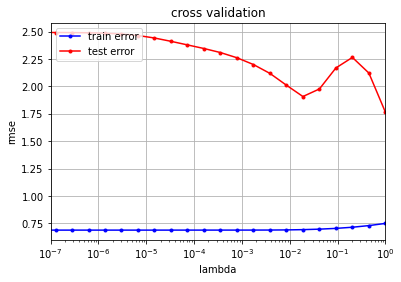

In [85]:
seed = 32
k_fold = 4
lambdas = np.logspace(-10, 0, 30)
ridge_rmse_tr_mean_j0, ridge_rmse_te_mean_j0, ridge_all_wts_mean_j0 = cross_validation_ridge(seed, k_fold,lambdas,y_tr_j0, x_tr_j0)

min_train_idx_j0= np.argmin(ridge_rmse_tr_mean_j0)
min_test_idx_j0= np.argmin(ridge_rmse_te_mean_j0)
ridg_wts_j0 = ridge_all_wts_mean_j0[min_test_idx_j0]


#print("minimum loss = {:.3f} (@ {:} iteration)".format(sgd_losses[min_idx],{min_idx}))
print("Min train loss= {:.2}(@ {:} iteration)  Min test loss= {:.2}(@ {:} iteration)".format(min(ridge_rmse_tr_mean_j0),min_train_idx_j0, min(ridge_rmse_te_mean_j0),min_test_idx_j0))

Min train loss= 0.79(@ 0 iteration)  Min test loss= 0.88(@ 0 iteration)


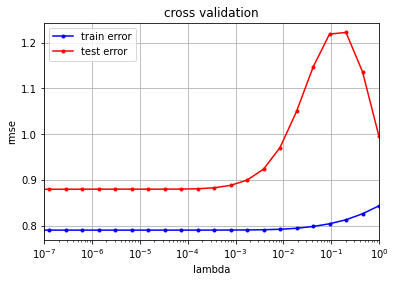

In [86]:
seed = 32
k_fold = 4
lambdas = np.logspace(-10, 0, 30)
ridge_rmse_tr_mean_j1, ridge_rmse_te_mean_j1, ridge_all_wts_mean_j1 = cross_validation_ridge(seed, k_fold,lambdas,y_tr_j1, x_tr_j1)

min_train_idx_j1= np.argmin(ridge_rmse_tr_mean_j1)
min_test_idx_j1= np.argmin(ridge_rmse_te_mean_j1)
ridg_wts_j1 = ridge_all_wts_mean_j1[min_test_idx_j1]


#print("minimum loss = {:.3f} (@ {:} iteration)".format(sgd_losses[min_idx],{min_idx}))
print("Min train loss= {:.2}(@ {:} iteration)  Min test loss= {:.2}(@ {:} iteration)".format(min(ridge_rmse_tr_mean_j1),min_train_idx_j1, min(ridge_rmse_te_mean_j1),min_test_idx_j1))

Min train loss= 0.75(@ 0 iteration)  Min test loss= 2.0(@ 11 iteration)


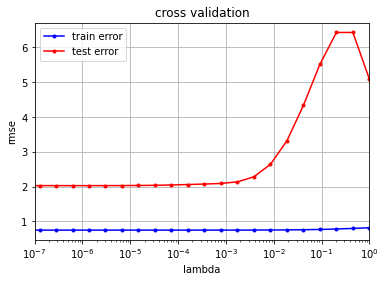

In [87]:
seed = 32
k_fold = 4
lambdas = np.logspace(-10, 0, 30)
ridge_rmse_tr_mean_j2, ridge_rmse_te_mean_j2, ridge_all_wts_mean_j2 = cross_validation_ridge(seed, k_fold,lambdas,y_tr_j2, x_tr_j2)

min_train_idx_j2= np.argmin(ridge_rmse_tr_mean_j2)
min_test_idx_j2= np.argmin(ridge_rmse_te_mean_j2)
ridg_wts_j2 = ridge_all_wts_mean_j2[min_test_idx_j2]


#print("minimum loss = {:.3f} (@ {:} iteration)".format(sgd_losses[min_idx],{min_idx}))
print("Min train loss= {:.2}(@ {:} iteration)  Min test loss= {:.2}(@ {:} iteration)".format(min(ridge_rmse_tr_mean_j2),min_train_idx_j2, min(ridge_rmse_te_mean_j2),min_test_idx_j2))

Min train loss= 0.77(@ 0 iteration)  Min test loss= 1.4(@ 24 iteration)


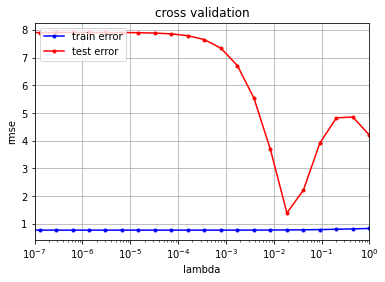

In [88]:
seed = 32
k_fold = 4
lambdas = np.logspace(-10, 0, 30)
ridge_rmse_tr_mean_j3, ridge_rmse_te_mean_j3, ridge_all_wts_mean_j3 = cross_validation_ridge(seed, k_fold,lambdas,y_tr_j3, x_tr_j3)

min_train_idx_j3= np.argmin(ridge_rmse_tr_mean_j3)
min_test_idx_j3= np.argmin(ridge_rmse_te_mean_j3)
ridg_wts_j3 = ridge_all_wts_mean_j2[min_test_idx_j3]


#print("minimum loss = {:.3f} (@ {:} iteration)".format(sgd_losses[min_idx],{min_idx}))
print("Min train loss= {:.2}(@ {:} iteration)  Min test loss= {:.2}(@ {:} iteration)".format(min(ridge_rmse_tr_mean_j3),min_train_idx_j3, min(ridge_rmse_te_mean_j3),min_test_idx_j3))

In [122]:
print("Optimal Lanbda values: \nj_0={:.1e}\nj_1={:.1e}\nj_2={:.1e}\nj_3={:.1e}".format(lambdas[min_test_idx_j0],lambdas[min_test_idx_j1],lambdas[min_test_idx_j2],lambdas[min_test_idx_j3]))

Optimal Lanbda values: 
j_0=1.0e+00
j_1=1.0e-10
j_2=6.2e-07
j_3=1.9e-02


In [89]:
ridg_wts_mean_j0 = np.mean(np.array([ridg_wts_j0[0],ridg_wts_j0[1],ridg_wts_j0[2],ridg_wts_j0[3]]),axis=0)
ridg_wts_mean_j1 = np.mean(np.array([ridg_wts_j1[0],ridg_wts_j1[1],ridg_wts_j1[2],ridg_wts_j1[3]]),axis=0)
ridg_wts_mean_j2 = np.mean(np.array([ridg_wts_j2[0],ridg_wts_j2[1],ridg_wts_j2[2],ridg_wts_j2[3]]),axis=0)
ridg_wts_mean_j3 = np.mean(np.array([ridg_wts_j3[0],ridg_wts_j3[1],ridg_wts_j3[2],ridg_wts_j3[3]]),axis=0)

In [96]:
from ridge_regression import build_poly
degree = 6
x_tr_j0_poly = build_poly (x_tr_j0, degree)
x_ts_j0_poly = build_poly (x_ts_j0, degree)
x_tr_j1_poly = build_poly (x_tr_j1, degree)
x_ts_j1_poly = build_poly (x_ts_j1, degree)
x_tr_j2_poly = build_poly (x_tr_j2, degree)
x_ts_j2_poly = build_poly (x_ts_j2, degree)
x_tr_j3_poly = build_poly (x_tr_j3, degree)
x_ts_j3_poly = build_poly (x_ts_j3, degree)

In [97]:
total_tr = x_tr_j0.shape[0] +x_tr_j1.shape[0] +x_tr_j2.shape[0] +x_tr_j3.shape[0] 
total_ts = x_ts_j0.shape[0] +x_ts_j1.shape[0] +x_ts_j2.shape[0] +x_ts_j3.shape[0] 
print(total_tr)
print(total_ts)
print("Ridge Regression Method:")

tr_corr_j0 =  classification(ridg_wts_mean_j0, x_tr_j0_poly, y_tr_j0)
tr_corr_j1 =  classification(ridg_wts_mean_j1, x_tr_j1_poly, y_tr_j1)
tr_corr_j2 =  classification(ridg_wts_mean_j2, x_tr_j2_poly, y_tr_j2)
tr_corr_j3 =  classification(ridg_wts_mean_j3, x_tr_j3_poly, y_tr_j3)
print("Training accuracy = ", (tr_corr_j0+tr_corr_j1+tr_corr_j2+tr_corr_j3)/total_tr)


ts_corr_j0 =  classification(ridg_wts_mean_j0, x_ts_j0_poly, y_ts_j0)
ts_corr_j1 =  classification(ridg_wts_mean_j1, x_ts_j1_poly, y_ts_j1)
ts_corr_j2 =  classification(ridg_wts_mean_j2, x_ts_j2_poly, y_ts_j2)
ts_corr_j3 =  classification(ridg_wts_mean_j3, x_ts_j3_poly, y_ts_j3)
print("Testing accuracy = ", (ts_corr_j0+ts_corr_j1+ts_corr_j2+ts_corr_j3)/total_ts)  

199999
50001
Ridge Regression Method:
Training accuracy =  0.7940089700448503
Testing accuracy =  0.7944041119177616


In [98]:
print(ts_corr_j0/x_ts_j0.shape[0])
print(ts_corr_j1/x_ts_j1.shape[0])
print(ts_corr_j2/x_ts_j2.shape[0])
print(ts_corr_j3/x_ts_j3.shape[0])

0.8148426162237902
0.7839319105035786
0.8109368797141723
0.7013309271373788


# Logistic Regression

In [73]:
from Log_Reg import logistic_regression_gradient_descent_demo

In [74]:
log_reg_loss_j0, all_log_reg_wts_j0 = logistic_regression_gradient_descent_demo(np.reshape(y_tr_j0,(y_tr_j0.shape[0],1)), x_tr_j0)
min_idx_j0= np.argmin(log_reg_loss_j0)
log_reg_wts_j0 = all_log_reg_wts_j0[min_idx_j0]
print("J0--> minimum loss = {:.3f} (@ {:} iteration)".format(log_reg_loss_j0[min_idx_j0],min_idx_j0))

log_reg_loss_j1, all_log_reg_wts_j1 = logistic_regression_gradient_descent_demo(np.reshape(y_tr_j1,(y_tr_j1.shape[0],1)), x_tr_j1)
min_idx_j1= np.argmin(log_reg_loss_j1)
log_reg_wts_j1 = all_log_reg_wts_j1[min_idx_j1]
print("J1--> minimum loss = {:.3f} (@ {:} iteration)".format(log_reg_loss_j1[min_idx_j1],min_idx_j1))

log_reg_loss_j2, all_log_reg_wts_j2 = logistic_regression_gradient_descent_demo(np.reshape(y_tr_j2,(y_tr_j2.shape[0],1)), x_tr_j2)
min_idx_j2= np.argmin(log_reg_loss_j2)
log_reg_wts_j2 = all_log_reg_wts_j2[min_idx_j2]
print("J2--> minimum loss = {:.3f} (@ {:} iteration)".format(log_reg_loss_j2[min_idx_j2],min_idx_j2))

log_reg_loss_j3, all_log_reg_wts_j3 = logistic_regression_gradient_descent_demo(np.reshape(y_tr_j3,(y_tr_j3.shape[0],1)), x_tr_j3)
min_idx_j3= np.argmin(log_reg_loss_j3)
log_reg_wts_j3 = all_log_reg_wts_j3[min_idx_j3]
print("J3--> minimum loss = {:.3f} (@ {:} iteration)".format(log_reg_loss_j3[min_idx_j3],min_idx_j3))

Current iteration=0, loss=0.6931271807599427
Current iteration=10, loss=0.47505019910407553
Current iteration=20, loss=0.3734252526391301
Current iteration=30, loss=0.3132875305092962
Current iteration=40, loss=0.27206998171462016
Current iteration=50, loss=0.2410844088781613
Current iteration=60, loss=0.21632205432801688
Current iteration=70, loss=0.19567163904997673
Current iteration=80, loss=0.17790367391409367
Current iteration=90, loss=0.16224780315607554
J0--> minimum loss = 0.150 (@ 99 iteration)
Current iteration=0, loss=0.6931271807599427
Current iteration=10, loss=0.5495400713043695
Current iteration=20, loss=0.47543777334558773
Current iteration=30, loss=0.42820706117355867
Current iteration=40, loss=0.394756606915803
Current iteration=50, loss=0.3694074442450686
Current iteration=60, loss=0.34924511827828764
Current iteration=70, loss=0.33261873332139524
Current iteration=80, loss=0.31851516948729247
Current iteration=90, loss=0.3062748857848294
J1--> minimum loss = 0.296 (

In [75]:
total_tr = x_tr_j0.shape[0] +x_tr_j1.shape[0] +x_tr_j2.shape[0] +x_tr_j3.shape[0] 
total_ts = x_ts_j0.shape[0] +x_ts_j1.shape[0] +x_ts_j2.shape[0] +x_ts_j3.shape[0] 
print(total_tr)
print(total_ts)
print("Logistic Regression:")

tr_corr_j0 =  classification(log_reg_wts_j0, x_tr_j0, y_tr_j0)
tr_corr_j1 =  classification(log_reg_wts_j1, x_tr_j1, y_tr_j1)
tr_corr_j2 =  classification(log_reg_wts_j2, x_tr_j2, y_tr_j2)
tr_corr_j3 =  classification(log_reg_wts_j3, x_tr_j3, y_tr_j3)
print("Training accuracy = ", (tr_corr_j0+tr_corr_j1+tr_corr_j2+tr_corr_j3)/total_tr)


ts_corr_j0 =  classification(log_reg_wts_j0, x_ts_j0, y_ts_j0)
ts_corr_j1 =  classification(log_reg_wts_j1, x_ts_j1, y_ts_j1)
ts_corr_j2 =  classification(log_reg_wts_j2, x_ts_j2, y_ts_j2)
ts_corr_j3 =  classification(log_reg_wts_j3, x_ts_j3, y_ts_j3)
print("Testing accuracy = ", (ts_corr_j0+ts_corr_j1+ts_corr_j2+ts_corr_j3)/total_ts)  

199999
50001
Logistic Regression:
Training accuracy =  0.6899434497172486
Testing accuracy =  0.6918461630767385


In [76]:
print(ts_corr_j0/x_ts_j0.shape[0])
print(ts_corr_j1/x_ts_j1.shape[0])
print(ts_corr_j2/x_ts_j2.shape[0])
print(ts_corr_j3/x_ts_j3.shape[0])

0.7066006105189411
0.6747694886839899
0.71347757046447
0.6359124746221521


# Regularized Logistic Regression 

In [77]:
from Reg_logReg import logistic_regression_penalized_gradient_descent_demo

In [78]:
log_reg_loss_j0, all_log_reg_wts_j0 = logistic_regression_penalized_gradient_descent_demo(np.reshape(y_tr_j0,(y_tr_j0.shape[0],1)), x_tr_j0)
min_idx_j0= np.argmin(log_reg_loss_j0)
log_reg_wts_j0 = all_log_reg_wts_j0[min_idx_j0]
print("J0--> minimum loss = {:.3f} (@ {:} iteration)".format(log_reg_loss_j0[min_idx_j0],min_idx_j0))

log_reg_loss_j1, all_log_reg_wts_j1 = logistic_regression_penalized_gradient_descent_demo(np.reshape(y_tr_j1,(y_tr_j1.shape[0],1)), x_tr_j1)
min_idx_j1= np.argmin(log_reg_loss_j1)
log_reg_wts_j1 = all_log_reg_wts_j1[min_idx_j1]
print("J1--> minimum loss = {:.3f} (@ {:} iteration)".format(log_reg_loss_j1[min_idx_j1],min_idx_j1))

log_reg_loss_j2, all_log_reg_wts_j2 = logistic_regression_penalized_gradient_descent_demo(np.reshape(y_tr_j2,(y_tr_j2.shape[0],1)), x_tr_j2)
min_idx_j2= np.argmin(log_reg_loss_j2)
log_reg_wts_j2 = all_log_reg_wts_j2[min_idx_j2]
print("J2--> minimum loss = {:.3f} (@ {:} iteration)".format(log_reg_loss_j2[min_idx_j2],min_idx_j2))

log_reg_loss_j3, all_log_reg_wts_j3 = logistic_regression_penalized_gradient_descent_demo(np.reshape(y_tr_j3,(y_tr_j3.shape[0],1)), x_tr_j3)
min_idx_j3= np.argmin(log_reg_loss_j3)
log_reg_wts_j3 = all_log_reg_wts_j3[min_idx_j3]
print("J3--> minimum loss = {:.3f} (@ {:} iteration)".format(log_reg_loss_j3[min_idx_j3],min_idx_j3))

Current iteration=0, loss=0.6931271807599427
Current iteration=10, loss=0.4925670947931299
Current iteration=20, loss=0.4229424812222896
Current iteration=30, loss=0.39828648855081955
Current iteration=40, loss=0.39341229097154196
Current iteration=50, loss=0.39889820459832354
Current iteration=60, loss=0.41052962018325234
Current iteration=70, loss=0.4261589318707074
Current iteration=80, loss=0.4445775805021869
Current iteration=90, loss=0.4650540917154967
loss=0.148197435108299
J0--> minimum loss = 0.393 (@ 39 iteration)
Current iteration=0, loss=0.6931271807599427
Current iteration=10, loss=0.5584725818289948
Current iteration=20, loss=0.5016938155932877
Current iteration=30, loss=0.47471948401893715
Current iteration=40, loss=0.4626654934557659
Current iteration=50, loss=0.45911715678322795
Current iteration=60, loss=0.4608275134317572
Current iteration=70, loss=0.4659906179432556
Current iteration=80, loss=0.4735236606833324
Current iteration=90, loss=0.4827407745396596
loss=0.29

In [79]:
total_tr = x_tr_j0.shape[0] +x_tr_j1.shape[0] +x_tr_j2.shape[0] +x_tr_j3.shape[0] 
total_ts = x_ts_j0.shape[0] +x_ts_j1.shape[0] +x_ts_j2.shape[0] +x_ts_j3.shape[0] 
print(total_tr)
print(total_ts)
print("Regularized Logistic Regression Method:")

tr_corr_j0 =  classification(log_reg_wts_j0, x_tr_j0, y_tr_j0)
tr_corr_j1 =  classification(log_reg_wts_j1, x_tr_j1, y_tr_j1)
tr_corr_j2 =  classification(log_reg_wts_j2, x_tr_j2, y_tr_j2)
tr_corr_j3 =  classification(log_reg_wts_j3, x_tr_j3, y_tr_j3)
print("Training accuracy = ", (tr_corr_j0+tr_corr_j1+tr_corr_j2+tr_corr_j3)/total_tr)


ts_corr_j0 =  classification(log_reg_wts_j0, x_ts_j0, y_ts_j0)
ts_corr_j1 =  classification(log_reg_wts_j1, x_ts_j1, y_ts_j1)
ts_corr_j2 =  classification(log_reg_wts_j2, x_ts_j2, y_ts_j2)
ts_corr_j3 =  classification(log_reg_wts_j3, x_ts_j3, y_ts_j3)
print("Testing accuracy = ", (ts_corr_j0+ts_corr_j1+ts_corr_j2+ts_corr_j3)/total_ts)  

199999
50001
Regularized Logistic Regression Method:
Training accuracy =  0.6881734408672043
Testing accuracy =  0.6898862022759544


In [80]:
print(ts_corr_j0/x_ts_j0.shape[0])
print(ts_corr_j1/x_ts_j1.shape[0])
print(ts_corr_j2/x_ts_j2.shape[0])
print(ts_corr_j3/x_ts_j3.shape[0])

0.7016463994395236
0.675027403443162
0.7131798332671695
0.6359124746221521


# Fusion of LS and ridgw_wts:

In [101]:
# fusion_wts_j0= np.mean(np.array([ridg_wts_mean_j0,wts_ls_j0]),axis=0) 
# fusion_wts_j1= np.mean(np.array([ridg_wts_mean_j1,wts_ls_j1]),axis=0) 
# fusion_wts_j2= np.mean(np.array([ridg_wts_mean_j2,wts_ls_j2]),axis=0) 
# fusion_wts_j3= np.mean(np.array([ridg_wts_mean_j3,wts_ls_j3]),axis=0) 


# total_tr = x_tr_j0.shape[0] +x_tr_j1.shape[0] +x_tr_j2.shape[0] +x_tr_j3.shape[0] 
# total_ts = x_ts_j0.shape[0] +x_ts_j1.shape[0] +x_ts_j2.shape[0] +x_ts_j3.shape[0] 
# print(total_tr)
# print(total_ts)
# print("Fusion Method:")

# tr_corr_j0 =  classification(fusion_wts_j0, x_tr_j0, y_tr_j0)
# tr_corr_j1 =  classification(fusion_wts_j1, x_tr_j1, y_tr_j1)
# tr_corr_j2 =  classification(fusion_wts_j2, x_tr_j2, y_tr_j2)
# tr_corr_j3 =  classification(fusion_wts_j3, x_tr_j3, y_tr_j3)
# print("Training accuracy = ", (tr_corr_j0+tr_corr_j1+tr_corr_j2+tr_corr_j3)/total_tr)


# ts_corr_j0 =  classification(fusion_wts_j0, x_ts_j0, y_ts_j0)
# ts_corr_j1 =  classification(fusion_wts_j1, x_ts_j1, y_ts_j1)
# ts_corr_j2 =  classification(fusion_wts_j2, x_ts_j2, y_ts_j2)
# ts_corr_j3 =  classification(fusion_wts_j3, x_ts_j3, y_ts_j3)
# print("Testing accuracy = ", (ts_corr_j0+ts_corr_j1+ts_corr_j2+ts_corr_j3)/total_ts)  

199999
50001
Fusion Method:
Training accuracy =  0.7033985169925849
Testing accuracy =  0.7031059378812424


## Do your thing crazy machine learning thing here :) ...

## Generate predictions and save ouput in csv format for submission:

In [100]:
DATA_TEST_PATH = 'test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
print(tX_test.shape, ids_test.shape)

(568238, 30) (568238,)


In [101]:
test_data_dict = matrix_to_dict (tX_test)

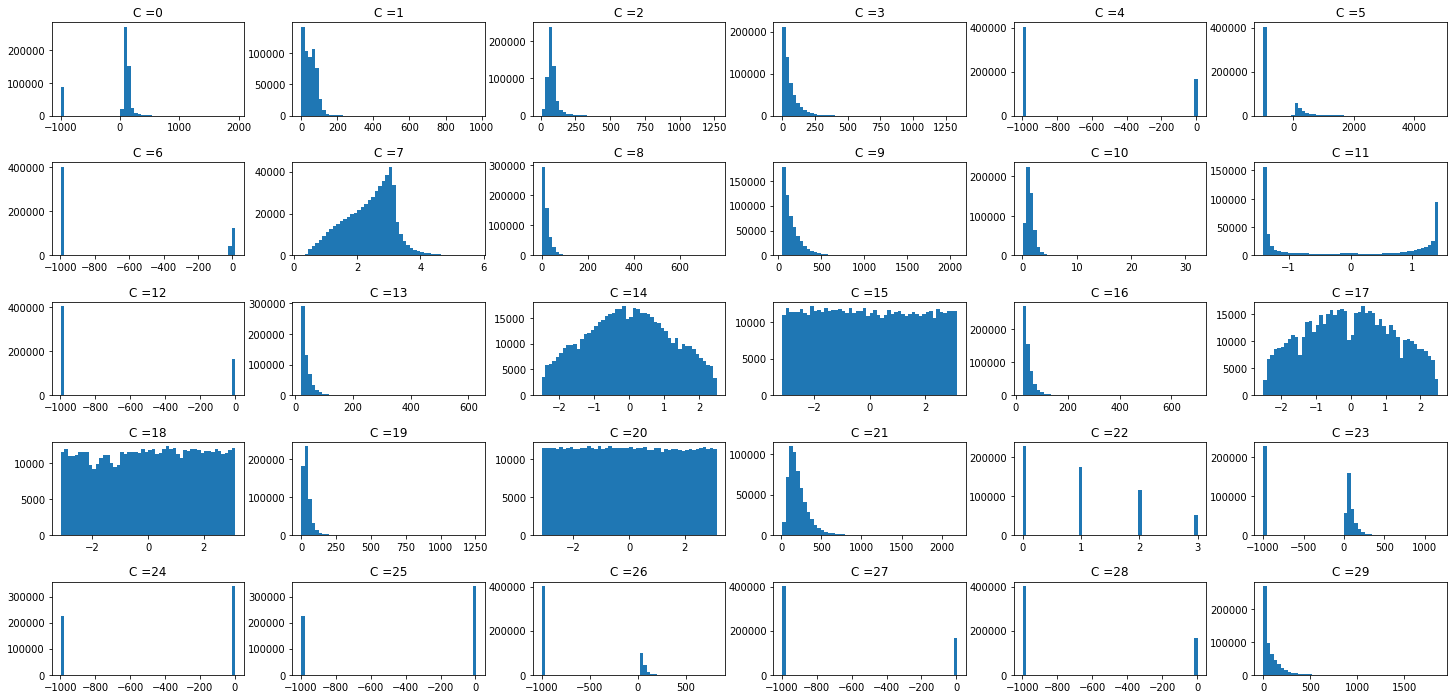

In [110]:
# Getting a good view of the distribution
fig, axs = plt.subplots(5,6, figsize=(25, 12))
fig.subplots_adjust(hspace = .5, wspace=.25)
ax = axs.flatten()
for i in range (0,30):
    ax[i].hist(test_data_dict[i], bins=50)
    ax[i].set_title('C ={}'.format(i))

In [102]:
########## Creating jet wise split for test data ###################

test_j0_idx= np.where (tX_test[:,22]==0)[0]
test_j1_idx= np.where (tX_test[:,22]==1)[0]
test_j2_idx= np.where (tX_test[:,22]==2)[0]
test_j3_idx= np.where (tX_test[:,22]==3)[0]


######## Creating jet number wise splits ########### 
X_test_j0, ids_test_j0 = jet_wise_split(test_j0_idx,tX_test,ids_test)
X_test_j1, ids_test_j1 = jet_wise_split(test_j1_idx,tX_test,ids_test)
X_test_j2, ids_test_j2 = jet_wise_split(test_j2_idx,tX_test,ids_test)
X_test_j3, ids_test_j3 = jet_wise_split(test_j3_idx,tX_test,ids_test)

#############  Creating jet wise dict ######
test_data_dict_j0 = matrix_to_dict(X_test_j0)
test_data_dict_j1 = matrix_to_dict(X_test_j1)
test_data_dict_j2 = matrix_to_dict(X_test_j2)
test_data_dict_j3 = matrix_to_dict(X_test_j3)

(227458, 30) (227458,)
(175338, 30) (175338,)
(114648, 30) (114648,)
(50794, 30) (50794,)


In [103]:
############# Identifying 0-var columns for test data ###################

no_var_col_j0_test = Zero_variance_detector(test_data_dict_j0)
no_var_col_j1_test = Zero_variance_detector(test_data_dict_j1)
no_var_col_j2_test = Zero_variance_detector(test_data_dict_j2)
no_var_col_j3_test = Zero_variance_detector(test_data_dict_j3)

print("Total 0 Variance columns:\nj_0:{}\nj_1:{}\nj_2:{}\nj_3:{}".format(len(no_var_col_j0_test)-1,len(no_var_col_j1_test)-1,len(no_var_col_j2_test)-1,len(no_var_col_j3_test)-1))

Total 0 Variance columns:
j_0:11
j_1:7
j_2:0
j_3:0


In [104]:
# removing the zero variance columns
data_j0_test = dict_to_matrix(test_data_dict_j0)
data_j1_test = dict_to_matrix(test_data_dict_j1)
data_j2_test = dict_to_matrix(test_data_dict_j2)
data_j3_test = dict_to_matrix(test_data_dict_j3)
print(data_j0_test.shape,data_j1_test.shape,data_j2_test.shape,data_j3_test.shape)

data_j0_new_test = np.delete(data_j0_test, no_var_col_j0, axis=1)
data_j1_new_test = np.delete(data_j1_test, no_var_col_j1, axis=1)
data_j2_new_test = np.delete(data_j2_test, no_var_col_j2, axis=1)
data_j3_new_test = np.delete(data_j3_test, no_var_col_j3, axis=1)

print(data_j0_new_test.shape,data_j1_new_test.shape,data_j2_new_test.shape,data_j3_new_test.shape)

(227458, 30) (175338, 30) (114648, 30) (50794, 30)
(227458, 18) (175338, 22) (114648, 29) (50794, 29)


In [105]:
########### Removing -999 values from test data ##################
outlier_col = [0]
data_dict_j0_fixed_test = start_999_handle(matrix_to_dict(data_j0_new_test),outlier_col,'median')
data_dict_j1_fixed_test = start_999_handle(matrix_to_dict(data_j1_new_test),outlier_col,'median')
data_dict_j2_fixed_test = start_999_handle(matrix_to_dict(data_j2_new_test),outlier_col,'median')
data_dict_j3_fixed_test = start_999_handle(matrix_to_dict(data_j3_new_test),outlier_col,'median')

print(len(data_dict_j0_fixed_test),len(data_dict_j1_fixed_test),len(data_dict_j2_fixed_test),len(data_dict_j3_fixed_test))

for col :0
for col :0
for col :0
for col :0
18 22 29 29


In [106]:
################# Normalizing the test data ###################
data_dict_j0_fixed_norm_test={}
data_dict_j1_fixed_norm_test={}
data_dict_j2_fixed_norm_test={}
data_dict_j3_fixed_norm_test={}
for i in range (0,len(data_dict_j0_fixed_test)):
    data_dict_j0_fixed_norm_test[i] = mean_var_normalize(data_dict_j0_fixed_test[i])
for i in range (0,len(data_dict_j1_fixed_test)):   
    data_dict_j1_fixed_norm_test[i] = mean_var_normalize(data_dict_j1_fixed_test[i])
for i in range (0,len(data_dict_j2_fixed_test)):    
    data_dict_j2_fixed_norm_test[i] = mean_var_normalize(data_dict_j2_fixed_test[i])
for i in range (0,len(data_dict_j3_fixed_test)):    
    data_dict_j3_fixed_norm_test[i] = mean_var_normalize(data_dict_j3_fixed_test[i])
    
print(len(data_dict_j0_fixed_norm_test),len(data_dict_j1_fixed_norm_test),len(data_dict_j2_fixed_norm_test),len(data_dict_j3_fixed_norm_test))

18 22 29 29


In [107]:
############ creating the final test matriz for pridictions ####################
test_data_j0_norm = dict_to_matrix(data_dict_j0_fixed_norm_test)
test_data_j1_norm = dict_to_matrix(data_dict_j1_fixed_norm_test)
test_data_j2_norm = dict_to_matrix(data_dict_j2_fixed_norm_test)
test_data_j3_norm = dict_to_matrix(data_dict_j3_fixed_norm_test)

print("J0-->",test_data_j0_norm.shape, ids_test_j0.shape)
print("J1-->",test_data_j1_norm.shape, ids_test_j1.shape)
print("J2-->",test_data_j2_norm.shape, ids_test_j2.shape)
print("J3-->",test_data_j3_norm.shape, ids_test_j3.shape)

J0--> (227458, 18) (227458,)
J1--> (175338, 22) (175338,)
J2--> (114648, 29) (114648,)
J3--> (50794, 29) (50794,)


In [108]:
from ridge_regression import build_poly
degree = 6
test_data_j0_norm_poly = build_poly (test_data_j0_norm, degree)
test_data_j1_norm_poly = build_poly (test_data_j1_norm, degree)
test_data_j2_norm_poly = build_poly (test_data_j2_norm, degree)
test_data_j3_norm_poly = build_poly (test_data_j3_norm, degree)


In [109]:

j0_pred = predict_labels(ridg_wts_mean_j0, test_data_j0_norm_poly)
j1_pred = predict_labels(ridg_wts_mean_j1, test_data_j1_norm_poly)
j2_pred = predict_labels(ridg_wts_mean_j2, test_data_j2_norm_poly)
j3_pred = predict_labels(ridg_wts_mean_j3, test_data_j3_norm_poly)

In [110]:
j0_pred_new = np.reshape(j0_pred,(j0_pred.shape[0],1))
j1_pred_new = np.reshape(j1_pred,(j1_pred.shape[0],1))
j2_pred_new = np.reshape(j2_pred,(j2_pred.shape[0],1))
j3_pred_new = np.reshape(j3_pred,(j3_pred.shape[0],1))

ids_test_j0_new = np.reshape(ids_test_j0,(ids_test_j0.shape[0],1))
ids_test_j1_new = np.reshape(ids_test_j1,(ids_test_j1.shape[0],1))
ids_test_j2_new = np.reshape(ids_test_j2,(ids_test_j2.shape[0],1))
ids_test_j3_new = np.reshape(ids_test_j3,(ids_test_j3.shape[0],1))

In [111]:
print(j0_pred_new.shape,j1_pred_new.shape,j2_pred_new.shape,j3_pred_new.shape)
print(ids_test_j0_new.shape,ids_test_j1_new.shape,ids_test_j2_new.shape,ids_test_j3_new.shape)

(227458, 1) (175338, 1) (114648, 1) (50794, 1)
(227458, 1) (175338, 1) (114648, 1) (50794, 1)


In [112]:
all_pred = np.vstack((j0_pred_new,j1_pred_new,j2_pred_new,j3_pred_new))
all_ids =  np.vstack((ids_test_j0_new,ids_test_j1_new,ids_test_j2_new,ids_test_j3_new))
print(all_pred.shape, all_ids.shape)

(568238, 1) (568238, 1)


In [113]:
OUTPUT_PATH = 'poly_test_output.csv' # TODO: fill in desired name of output file for submission
create_csv_submission(all_ids, all_pred, OUTPUT_PATH)

In [31]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)